In [54]:
#Import python libraries/packages

# Pandas to handle dataframes
import pandas as pd    

# Import Scikit-Learn library for the regression model
import sklearn         
from sklearn import preprocessing #sklearn for normalization function
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# SequentialFeatureSelector
from sklearn.datasets import make_regression
from sklearn.feature_selection import f_regression, SequentialFeatureSelector, SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Import numpy 
import numpy as np

# Another statistic model library
import statsmodels.api as sm
import statsmodels.formula.api as smf

import scipy.stats as stats
import scipy
from scipy import interpolate
from scipy.interpolate import interp1d

# Import plotting libraries
import matplotlib 
from matplotlib import pyplot as plt

# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 18})

In [31]:
# Open and load dataset
bacterial_csv = pd.read_csv('compiled_features_complete.csv')
df = pd.DataFrame(data=bacterial_csv)
df

,Unnamed: 0,GENENAME,ORG,ENTREZID,REFSEQ,LOG2FC,True_EID,SEQUENCE,AA_NP,AA_POS,AA_POL,AA_NEG,MW,AROM,ISO_E
0,0,ABC_transporter,PA,879411,NP_248876,-0.038469,15595384,mkaltssllglfaapvlagllgayvplasaappkeiriavpdvsag...,59.773371,11.614731,17.847025,10.764873,37193.0756,0.070822,6.871061
1,1,ABC_transporter,PA,883108,NP_248894,-0.207718,15595400,mhqriasiglgltlalggsaqaagqlnvvswsgyfspqllekfeke...,54.941860,11.337209,22.674419,11.046512,37859.8560,0.093023,6.033937
2,2,ABC_transporter,PA,878380,NP_249014,-0.187309,15595520,mtyrtpltllfaaglalggqaraegtlhfanwsdyyppellkkfek...,52.449568,14.121037,20.461095,12.968300,38901.0268,0.112392,6.350359
3,3,ABC_transporter,PA,880771,NP_249293,0.085173,15595799,mlpamrtgllcallgvtapawaeyvtvisfggankeaqetafykpf...,59.593023,11.918605,17.732558,10.755814,37832.8132,0.116279,6.919602
4,4,ABC_transporter,PA,879023,NP_249295,0.038834,15595801,mskslkaaslkfatlaaglacaaqamavdltvvsfgganksaqika...,54.310345,11.494253,22.413793,11.781609,38166.9526,0.112069,5.869103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,431,RNA_polymerase,BS,939937,NP_388354,-0.055848,728883360,mtqpskttkltkdevdrlisdyqtkqdeqaqetlvrvytnlvdmla...,42.748092,16.030534,24.809160,16.412214,29900.8971,0.049618,5.545803
432,432,RNA_polymerase,BS,936362,NP_391300,-0.140629,728886343,mdmklqqvqvlkpqltqelrqaitllgyhsaelaeyidelslenpl...,43.807339,15.596330,27.752294,12.844037,49700.0669,0.064220,7.716086
433,433,RNA_polymerase,BS,938729,NP_390226,-0.528350,728885268,mdvevkkngknaqlkdhevkelikqsqngdqqardllieknmrlvw...,43.137255,16.862745,21.568627,18.431373,29372.0675,0.058824,5.252059
434,434,RNA_polymerase,BS,939953,NP_389416,0.303125,728884442,msrnkveicgvdtsklpvlkneemrklfrqlqdegddsareklvng...,45.384615,16.153846,21.923077,16.538462,30073.0463,0.061538,5.632312


In [32]:
X= df[['AA_NP','AA_POS','AA_NEG', 'AA_POL', 'MW', 'AROM', 'ISO_E']]
y= df['LOG2FC']

In [33]:
X_arr = X.values #returns a numpy array for X (needed to use the min_max_scaler)

X_col_names = list(X.columns.values.tolist()) #get column names to then put back into X_norm

#min-max normalization (rescaling) of input features
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_arr)
X_norm= pd.DataFrame(X_scaled)

#put back the original column names
X_norm.columns = X_col_names

X = X_norm
X

,AA_NP,AA_POS,AA_NEG,AA_POL,MW,AROM,ISO_E
0,0.560010,0.473362,0.223260,0.250886,0.208999,0.329985,0.380891
1,0.452176,0.457427,0.231083,0.387387,0.213203,0.452431,0.267864
2,0.396551,0.617272,0.284465,0.324803,0.219767,0.559252,0.310587
3,0.555985,0.490810,0.223009,0.247650,0.213032,0.580691,0.387445
4,0.438081,0.466444,0.251502,0.380018,0.215139,0.557471,0.245608
...,...,...,...,...,...,...,...
431,0.180024,0.726915,0.380126,0.447750,0.163027,0.213046,0.201957
432,0.203666,0.701983,0.281013,0.530971,0.287848,0.293578,0.494985
433,0.188710,0.774700,0.436212,0.356120,0.159693,0.263815,0.162296
434,0.238869,0.733995,0.383633,0.366142,0.164112,0.278788,0.213637


In [34]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 32.109112
Feature 1: 9.697155
Feature 2: 0.884012
Feature 3: 0.000144
Feature 4: 65.125590
Feature 5: 164.008760
Feature 6: 158.208095


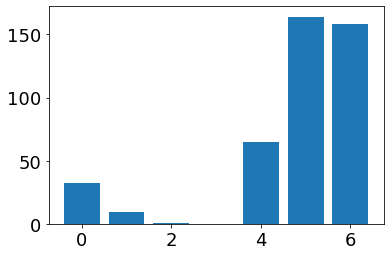

In [36]:
X, y = make_regression(n_samples=435, n_features=7, noise=0.1, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [44]:
# specify 6 most relevant features

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k=6)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [52]:
# load the dataset
X, y = make_regression(n_samples=435, n_features=6, n_informative=7, noise=0.1, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
mse = mean_squared_error(y_test, yhat)
print('MSE: %.3f' % mse)

MSE: 0.009


## Another approach to feature selection:

In [71]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier

In [61]:
df

,GENENAME,ORG,ENTREZID,REFSEQ,LOG2FC,True_EID,SEQUENCE,AA_NP,AA_POS,AA_POL,AA_NEG,MW,AROM,ISO_E
0,ABC_transporter,PA,879411,NP_248876,-0.038469,15595384,mkaltssllglfaapvlagllgayvplasaappkeiriavpdvsag...,59.773371,11.614731,17.847025,10.764873,37193.0756,0.070822,6.871061
1,ABC_transporter,PA,883108,NP_248894,-0.207718,15595400,mhqriasiglgltlalggsaqaagqlnvvswsgyfspqllekfeke...,54.941860,11.337209,22.674419,11.046512,37859.8560,0.093023,6.033937
2,ABC_transporter,PA,878380,NP_249014,-0.187309,15595520,mtyrtpltllfaaglalggqaraegtlhfanwsdyyppellkkfek...,52.449568,14.121037,20.461095,12.968300,38901.0268,0.112392,6.350359
3,ABC_transporter,PA,880771,NP_249293,0.085173,15595799,mlpamrtgllcallgvtapawaeyvtvisfggankeaqetafykpf...,59.593023,11.918605,17.732558,10.755814,37832.8132,0.116279,6.919602
4,ABC_transporter,PA,879023,NP_249295,0.038834,15595801,mskslkaaslkfatlaaglacaaqamavdltvvsfgganksaqika...,54.310345,11.494253,22.413793,11.781609,38166.9526,0.112069,5.869103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,RNA_polymerase,BS,939937,NP_388354,-0.055848,728883360,mtqpskttkltkdevdrlisdyqtkqdeqaqetlvrvytnlvdmla...,42.748092,16.030534,24.809160,16.412214,29900.8971,0.049618,5.545803
432,RNA_polymerase,BS,936362,NP_391300,-0.140629,728886343,mdmklqqvqvlkpqltqelrqaitllgyhsaelaeyidelslenpl...,43.807339,15.596330,27.752294,12.844037,49700.0669,0.064220,7.716086
433,RNA_polymerase,BS,938729,NP_390226,-0.528350,728885268,mdvevkkngknaqlkdhevkelikqsqngdqqardllieknmrlvw...,43.137255,16.862745,21.568627,18.431373,29372.0675,0.058824,5.252059
434,RNA_polymerase,BS,939953,NP_389416,0.303125,728884442,msrnkveicgvdtsklpvlkneemrklfrqlqdegddsareklvng...,45.384615,16.153846,21.923077,16.538462,30073.0463,0.061538,5.632312


In [69]:
# define columns of interest
X = df.iloc[:,7:14]
y = df.iloc[:,4]

In [72]:
# apply SelectKBest class to extract top 3 features

model = ExtraTreesClassifier()
model.fit(X,y)

ValueError: Unknown label type: 'continuous'